# Flights' data preprocessing 



Here we have a data set of flights:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats 

In [2]:
! pip install topsispy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
flights=pd.read_csv('flights.csv')
flights.info()
flights.nunique()
flights.head(1) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.


In [3]:
try:
    flights=flights.drop(['time_hour' , 'name'],axis=1)
except:
    pass

 <div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:blue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:white ;">📌 Some required function for conversion of data types:

</p>
</div>


In [4]:
from datetime import datetime
def day_of_year(day, month):
    date_str = f'{month}-1-2013'
    date_obj = datetime.strptime(date_str, '%m-%d-%Y')
    day_of_year = date_obj.timetuple().tm_yday + day - 1
    return day_of_year


def change_to_minute_of_day( hhmm):
    mm=np.remainder(hhmm,100)
    hh=(hhmm-mm)/100
    return(60*hh+mm)

def duration_minutes(starttime_inminutes,endtime_inminutes):
    if endtime_inminutes<starttime_inminutes:
        return(24*60-starttime_inminutes+endtime_inminutes)
    else:
        return(endtime_inminutes - starttime_inminutes)
    
def add_minutes( starttime_inminutes , duration_in_minutes):
    t=starttime_inminutes+duration_in_minutes
    if t<24*60:
        return (t)
    else:
        return(t-24*60)
        
def subtract_minutes( endtime_inminutes , duration_in_minutes):
    t=endtime_inminutes-duration_in_minutes
    if t>0:
        return (t)
    else:
        return(24*60+t)

 <div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:blue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:white ;">📌 Organize the dates that flights are done:

</p>
</div>




In [5]:

print(flights.year.unique())
try:
    flights=flights.drop('year',axis=1) 
except:
    pass

flights['dayOfYear'] = flights.apply(lambda row: day_of_year(row['day'], row['month']), axis=1) 


[2013]


 <div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:blue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:white ;">📌 Investigation on arrival and departure and also air times:  
</p>    
</div>

<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> 
First of all, the columns "dep_time, sched_dep_time ,arr_time and sched_arr_time",  seem to be integers. But they are stated in "hhmm" type in fact. Using "change_to_minute_of_day" function, we change them into valid integer types.
We also have some rows that their 'arr_delay' are null and we should compute diff(arr_time, sched_arr_time) for them as much as possible.
</p>    
</div>

In [6]:
df =flights
df.dep_time =change_to_minute_of_day(df.dep_time)
df.sched_dep_time = change_to_minute_of_day(df.sched_dep_time)
df.arr_time =change_to_minute_of_day(df.arr_time)
df.sched_arr_time = change_to_minute_of_day(df.sched_arr_time )

print(f" Number of null dep_delays before calculation is {len(df.loc[df.dep_delay.isnull()])}") 
df.loc[df.dep_delay.isnull() , 'arr_delay']= df.apply ( lambda row: duration_minutes( row['sched_dep_time'] , row['dep_time']) , axis=1)
print(f" Number of null dep_delays after calculation is {len(df.loc[df.dep_delay.isnull()])} \n")

print(f" Number of null arr_delays before calculation is {len(df.loc[df.arr_delay.isnull()])}")   
df.loc[df.arr_delay.isnull() , 'arr_delay']= df.apply ( lambda row: duration_minutes( row['sched_arr_time'] , row['arr_time']) , axis=1)
print(f" Number of null arr_delays after calculation is {len(df.loc[df.arr_delay.isnull()])}")   


 Number of null dep_delays before calculation is 8255
 Number of null dep_delays after calculation is 8255 

 Number of null arr_delays before calculation is 9430
 Number of null arr_delays after calculation is 8713


<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> 
There are some null values in 'air_time' , 'dep_time' and 'arr_time' columns. We considered 4 categories of Null types and describe how to face with them :
    <table>
            <tr>
                <td> 
                    <ul>
                    <li> dep✔️_arr✔️_air❌ </li>
                    <li> dep✔️_arr❌_air✔️</li>
                    <li> dep❌_arr✔️_air✔️ </li>
                    </ul>
                </td>
                <td> Missing value </td>
                <td> Must be filled logically: e.g. in the first case: air_time= diff('arr_time' , 'dep_time')</td>
                <td>  </td> 
            </tr> 
            <tr>
                <td> <li> dep✔️_arr❌_air❌ </li> </td>
                <td> Cashed flight or a flight with technical problems</td>
                <td> The approach is NOT to fill any values. </td>
                <td>   </td> 
            </tr>
            <tr>
                <td> <li>dep❌_arr❌_air❌</li></td>
                <td> Canceled flight  </td>
                <td> The approach is NOT to fill any values </td>
                <td>  </td>  
            </tr>
            <tr>
                <td> 
                    <ul>
                     <li> dep❌_arr✔️_air❌</li> 
                     <li> dep❌_arr❌_air✔️</li>
                    </ul>
                </td>
                <td> Missing values   </td>
                <td> Must be filled huristcally by sklearn imputers. </td> 
                <td>   </td> 
            </tr>
</table>
    
    
Based on the above table, we chack all the cases in the following:
</p>    
</div>

<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> 
First, check if we can get the null data of columns 'air_time' , 'dep_time' and 'arr_time' from each other.
</p>    
</div>

In [7]:
print(f"Currently we have {len(df)} records totally.") 
print(f"Number of null air_times before calculation is {len(df.loc[df.air_time.isnull()])}")
df.loc[df.air_time.isnull()& df.dep_time.notnull() & df.arr_time.notnull() , 'air_time'] = \
            df.apply( lambda row: duration_minutes( row['dep_time'] , row['arr_time']) , axis=1 )
print(f"Number of null air_times after calculation is :{len(df[df.air_time.isnull()])}")

print( f"Number of null dep_times before calculation : {len(df[df.dep_time.isnull()])}") 
df.loc[df.dep_time.isnull() & df.air_time.notnull() & df.arr_time.notnull() , 'dep_time' ]=\
             df.apply( lambda row: subtract_minutes(row['arr_time'] , row['air_time'])  , axis=1 )
print( f"Number of null dep_times after calculation : {len(df[df.dep_time.isnull()])}")


print( f"Number of null arr_times before calculation : {len(df[df.arr_time.isnull()])}" )
df.loc[df.arr_time.isnull() & df.air_time.notnull() & df.dep_time.notnull() , 'arr_time'] = \
             df.apply( lambda row:  add_minutes(row['dep_time'] , row['air_time']) , axis=1 )
print( f"Number of null arr_times after calculation : {len(df[df.arr_time.isnull()])}" )

Currently we have 336776 records totally.
Number of null air_times before calculation is 9430
Number of null air_times after calculation is :8713
Number of null dep_times before calculation : 8255
Number of null dep_times after calculation : 8255
Number of null arr_times before calculation : 8713
Number of null arr_times after calculation : 8713


In [8]:
print(f"Total records: {len(df)}")  

Total records: 336776


<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> After filling missing 'air_time' values,  let' define an extra useful column "speed" for the flights:
</p>    
</div>

In [9]:

flights['speed']= flights.distance / flights.air_time
#flights['day_of_week'] = pd.to_datetime(flights[['year', 'month', 'day']]).dt.day_name() 
#avg_delay_by_day = flights.groupby('day_of_week')[['arr_delay' , 'dep_delay']].mean()

 <div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:blue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:white ;">📌 Canceled or crashed flights:  
</p>    
</div> 

<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> Due to the following cell, for all the flights which are not departured, we have no value for their 'arr_time' and 'air_time' in our data set. So, we can conclude that if there is a flight which is not departured, that' s a cancelled flight.
</p>    
</div>

In [10]:
canceled = df.loc[df.dep_time.isnull()& df.air_time.isnull() & df.arr_time.isnull() ] 
dep_nulls= df.loc[df.dep_time.isnull()]  

print( len(canceled) , len(dep_nulls)  )


8255 8255


<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> We also have some flights that are departured, but they are not arrived (i.e. their arr_time and air_time values are null). 
Hence, we can conclude that those flights are crashed or they had technical problems and they came back after departure. Due to the following cell, we have 458 crashed flights.
</p>    
</div>

In [11]:
departured=df.loc[df.dep_time.notnull()] 
crashed=departured.loc[departured.arr_time.isnull() & departured.air_time.isnull()]  
print(  len(crashed  )   )

458


<div style="color:black;
           display:fill; 
           background-color:pink;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> 
According to the table we mentioned previusly, there is no other case of Nulls in our columns dep_time, arr_time  or air_time . All nulls in these columns were filled logically or they were due to canceled or crashed flights which should not be filled. 

</p>    
</div>

<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;">   
   Now, let's define binary columns 'canceled' and 'crashed' indicating the status of the flights:
</p>    
</div>

In [12]:
df['canceled'] =0
df['crashed'] = 0 
#cancelled flights:
df.loc[df.dep_time.isnull() , 'canceled']=1 
#crashed flights:
df.loc[df.dep_time.notnull() & df.arr_time.isnull() , 'crashed']=1   

.



# Dealing with Categoical features:



.

 <div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:blue;
           font-size:120%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
          color:white ;">📌<b> Ranking categorical feature 'carrier' using "TOPSIS" method</b>: 
</p>    
</div> 

<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> 
First, we gather some criterions in which we want to assess our carriers due to them. In the following we considered these criterions for each carrier: 
  <ul style="list-style-type: ">  
    <li>   <b>Flightsmileage</b>: Carrier's total flights mileage (total distance of flights that are not canceled nor crashed)   </li> 
    <li>   <b>flightsCount</b>: Carrier's total Flight done (not canceled nor crashed)     </li>
    <li>   <b>meanDepDelay</b>: Carrier's mean of departure delays over its whole flights  </li>
    <li>   <b>meanArrDelay</b>: Carrier's mean of arrival delays over its whole flights  </li>
    <li>   <b>crashed</b>: Carrier's total flights which are cancelled  </li>
    <li>   <b>canceled</b>: Carrier's total flights which are crashed  </li>
    <li>   <b>airPlanesCount</b>: Carrier's active airplanes number (nunique of tainums)  </li>
    <li>   <b>meanSpeed</b>: Carrier's mean of flights' speed  </li>
    <li>   <b>activeRoutes</b>: Carrier's active routes (nunique of tainums)  </li>
    </ul>
The criterions' values are computed as follows: 
</p>    
</div>


In [13]:
df['routes'] = df['origin'] + ' - ' + df['dest']
print(df.routes.nunique())

#print(df.loc[(df.crashed==0) & (df.canceled==0)])
ranking_carriers=df.groupby('carrier').agg({ 
                                            'dep_delay':'mean', 
                                            'arr_delay':'mean' ,
                                            'canceled':'sum' ,
                                            'crashed': 'sum',
                                            'tailnum':'nunique' ,
                                            'speed':'mean' , 
                                            'routes':'nunique'
                                           }) 

ranking_carriers['flightsCount'] = df.loc[(df.crashed==0) & (df.canceled==0)].groupby('carrier')['id'].count()
ranking_carriers['Flightsmileage'] = df.loc[(df.crashed==0) & (df.canceled==0)].groupby('carrier')['distance'].sum()

ranking_carriers .columns=[ 'meanDepDelay' , 'meanArrDelay' , 'crashed' ,'canceled' , 'airPlanesCount' , 'meanSpeed' , 'activeRoutes', 'flightsCount' ,  'Flightsmileage']
ranking_carriers = ranking_carriers.reset_index().rename(columns={'index': 'id'})
ranking_carriers


224


,carrier,meanDepDelay,meanArrDelay,crashed,canceled,airPlanesCount,meanSpeed,activeRoutes,flightsCount,Flightsmileage
0,9E,16.725769,7.738195,1044,71,203,5.752548,77,17345,9222844
1,AA,8.586016,0.926885,636,34,600,6.948319,25,32059,43064382
2,AS,5.804775,-9.596910,2,0,84,7.407653,1,712,1710224
3,B6,13.022522,9.759167,466,32,193,6.661705,55,54137,57933040
4,DL,9.264505,1.986177,349,15,629,6.969535,55,47746,59119893
5,EV,19.955390,16.221888,2817,105,316,6.040625,102,51251,28870410
6,F9,20.215543,21.920705,3,1,25,7.086202,1,681,1103220
7,FL,18.726075,20.488526,73,6,129,6.564735,3,3181,2115272
8,HA,4.900585,-6.915205,0,0,14,8.005962,1,342,1704186
9,MQ,10.552041,11.066757,1234,87,237,6.134701,24,25076,14307664


<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> 
TOPSIS, known as Technique for Order of Preference by Similarity to Ideal Solution, is a multi-criteria decision analysis method. It compares a set of alternatives based on pre-specified criterions. Depending on the importace of each criteria, a weigth is considered. The weights are sumup to 1. Also the positive effect or negative effect of each criteria is shown by 1 or -1 . In the following, these parameters are given to the model and the ranking of carriers are specified by the model:
</p>    
</div>

In [14]:
import topsispy as tp

weights_signs={  'meanDepDelay': [0.025, -1],
                 'meanArrDelay': [0.025, -1],
                 'crashed': [0.1,-1],
                 'canceled':[0.05,-1],
                 'airPlanesCount':[0.05 , 1],
                 'meanSpeed':[0.05,1],
                 'activeRoutes':[0.2, 1], 
                 'flightsCount': [0.20 , 1] ,
                 'Flightsmileage': [0.30 , 1]
              }

a = np.array(ranking_carriers[weights_signs.keys()]  ) 
w= [x[0] for x in list(weights_signs.values()) ]
sign= [x[1] for x in list(weights_signs.values()) ] 
ranking_carriers['carrier_rank'] = tp.topsis(a, w, sign)[1]


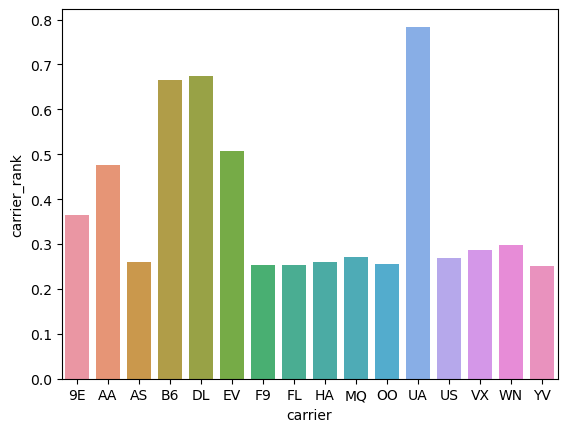

In [15]:
sns.barplot(data=ranking_carriers , x='carrier' , y='carrier_rank'  );
 

In [16]:
ranking_carriers['carrier_rank'].nunique()


16

<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> 
Since we have 16 distinct rank corresponding to 16 carriers, we can substitute categorical value of the carriers with their rank as its quantitive value. The following cell does this:
</p>    
</div>

In [17]:
df=df.merge( ranking_carriers[['carrier' , 'carrier_rank']]   , on='carrier')
try:
    df=df.drop('carrier' , axis=1)
except:
    pass
df.columns

Index(['id', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'flight', 'tailnum',
       'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'dayOfYear',
       'speed', 'canceled', 'crashed', 'routes', 'carrier_rank'],
      dtype='object')

<div style="color:black;
           display:fill; 
           background-color:pink;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;">     
From now on, we may define different machine learning problems and choose different parts of our dataframe to work on:
    <ul>
        <li> <b> Predicting a flight will be crashed or canceled or none of them </b> </li>
        <li> <b> Predicting arrival delay or departure delay for a flight</b></li>
    </ul>
based on each problem we only consider dataset's related parts:
    <ul>
    <li> For the first problem, we should obviously drop dep_time and arr_time and air_time columns.</li>
    <li> For the second problem we do not include rows corresponding to the canceled or crashed flights in our dataset. We also do not need 'canceled' and 'crashed' columns. These values were only reflected in rank of carriers when quantified 'carrier' column and we do not need them anymore. It is emphasized again that the nulls corresponding to canceled or crashed flights are not due to the lack of data. Hence they are not missing values and we do not need to fill these nulls by different imputers. 
    </li>
    </ul>
   
    
    
<b> Now on we continue with the dataset without canceled or crashed flights. </b>
    
</p>    
</div>

In [18]:
dfOld=df

In [19]:
df=df.loc[(df.crashed==0) & (df.canceled==0)] [ ['id', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
                                                   'arr_time', 'sched_arr_time', 'arr_delay', 'flight', 'tailnum',
                                                   'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'dayOfYear',
                                                   'speed', 'routes', 'carrier_rank']
                                              ]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328063 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              328063 non-null  int64  
 1   month           328063 non-null  int64  
 2   day             328063 non-null  int64  
 3   dep_time        328063 non-null  float64
 4   sched_dep_time  328063 non-null  float64
 5   dep_delay       328063 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  328063 non-null  float64
 8   arr_delay       328063 non-null  float64
 9   flight          328063 non-null  int64  
 10  tailnum         328063 non-null  object 
 11  origin          328063 non-null  object 
 12  dest            328063 non-null  object 
 13  air_time        328063 non-null  float64
 14  distance        328063 non-null  int64  
 15  hour            328063 non-null  int64  
 16  minute          328063 non-null  int64  
 17  dayOfYear 

<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> According to the above table, we do not have null values anymore.   
</p>    
</div>

 <div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:blue;
           font-size:120%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
          color:white ;">📌<b> Categorical features: origin , destination and route </b> 
</p>    
</div> 

<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> 
 Previously we merged origin and destination information into one column 'route'. so we can ignore individual columns 'origin' and 'distance' and only consider 'routes' column. Now we should find a quantitive vale instead of the 'route' column.The first quantitive substitutionis value for the routes seems to be a  their distance value. But we should ensure that there exists a one-to-one relationship between routes and their distance values.  
</p>  
</div>

In [20]:
#df2 gathers all distinct pairs of routes-distances
df2=df [['distance','routes']]. drop_duplicates() 


<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> 
    In order to do that, First, we investigate whether there is a unique distance value for every individual route or not:

</p> 
</div>

In [21]:
#create an empty dict for possible routes which their distance values must be corrected
to_correct={}

#Search for possible route r with more than one distance value !!
for r in  df2.routes.unique() :
    R=df2.loc[df.routes==r]
    if (len(R) >1):
        to_correct[r]=R.distance.mean()
        print(R) 
print(f"Routes which must be corrected: {to_correct}")

       distance     routes
44         1726  EWR - EGE
17565      1725  EWR - EGE
       distance     routes
58731      1747  JFK - EGE
68429      1746  JFK - EGE
Routes which must be corrected: {'EWR - EGE': 1725.5, 'JFK - EGE': 1746.5}


<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> Now we must investigate whether there is some different routes with the same distance or not. Here is the list of the routes with the same distance:

</p>    
</div>

In [22]:
route_counts = df2.groupby('distance').size() 

In [23]:
same_distance_routes=[]
for distance, count in route_counts.items():
    if count > 1:
        r=df2[df2['distance'] == distance]['routes'].tolist()
        same_distance_routes . append( (distance , r) ) 
print(pd.DataFrame(same_distance_routes , columns=['dist','routes'] ) )

    dist                  routes
0    184  [JFK - BWI, LGA - BOS]
1    195  [EWR - SYR, LGA - MHT]
2    199  [EWR - DCA, JFK - ACK]
3    209  [JFK - SYR, EWR - MHT]
4    266  [JFK - BTV, EWR - BTV]
5    284  [EWR - PWM, EWR - ORF]
6    292  [LGA - BUF, LGA - RIC]
7    725  [EWR - MKE, LGA - MDW]
8   1428  [JFK - HOU, LGA - HOU]
9   2434  [EWR - SNA, EWR - PDX]
10  2454  [EWR - LAX, JFK - PDX]
11  2465  [JFK - LGB, JFK - BUR]


<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> 
To deal with such routes, we add a tiny value to the distance values for the route with the same distance. For instance, the routes with 184 miles distance, will have 184 , 184.1 miles of distance:
</p>    
</div>

In [24]:

for d , routes in same_distance_routes:
    for i,r in enumerate(routes):
        #leave the first route with the same distance d and change the rest routes' distances by d+0.1 , d+0.2 , ....
        if i!=0: 
            to_correct[r]= d+i*0.1  
            
print(pd.DataFrame({'routes' :  to_correct.keys()  , 'distance' :  to_correct.values()})) 

       routes  distance
0   EWR - EGE    1725.5
1   JFK - EGE    1746.5
2   LGA - BOS     184.1
3   LGA - MHT     195.1
4   JFK - ACK     199.1
5   EWR - MHT     209.1
6   EWR - BTV     266.1
7   EWR - ORF     284.1
8   LGA - RIC     292.1
9   LGA - MDW     725.1
10  LGA - HOU    1428.1
11  EWR - PDX    2434.1
12  JFK - PDX    2454.1
13  JFK - BUR    2465.1


<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> 
    Now we substitute new values in our main dataframe:
</p>    
</div>

In [25]:

df.distance=df.distance.astype('float')

for r  in  to_correct.keys(): 
    df.loc[ (df['routes'] == r)  , 'distance']=  to_correct[r]
        

print(f"Number of distinct distance routes is : {df.routes.nunique()}")   
print(f"Number of distinct distance values is : {df.distance.nunique()}")        



Number of distinct distance routes is : 223
Number of distinct distance values is : 223


<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> 
Now on we can drop route column and use distance column instead as its equivalent quantitive value.
</p>    
</div>

In [26]:
try:
    df=df.drop(['routes','id','tailnum' , 'origin' , 'dest','flight'] , axis=1)
except:
    pass

 <div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:blue;
           font-size:120%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
          color:white ;">📌<b> Outlier detection </b> 
</p>    
</div> 

In [27]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328063 entries, 0 to 336775
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   month           328063 non-null  int64  
 1   day             328063 non-null  int64  
 2   dep_time        328063 non-null  float64
 3   sched_dep_time  328063 non-null  float64
 4   dep_delay       328063 non-null  float64
 5   arr_time        328063 non-null  float64
 6   sched_arr_time  328063 non-null  float64
 7   arr_delay       328063 non-null  float64
 8   air_time        328063 non-null  float64
 9   distance        328063 non-null  float64
 10  hour            328063 non-null  int64  
 11  minute          328063 non-null  int64  
 12  dayOfYear       328063 non-null  int64  
 13  speed           328063 non-null  float64
 14  carrier_rank    328063 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 48.1 MB


Index(['month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time',
       'sched_arr_time', 'arr_delay', 'air_time', 'distance', 'hour', 'minute',
       'dayOfYear', 'speed', 'carrier_rank'],
      dtype='object')

C:\ProgramData\anaconda3\lib\site-packages\matplotlib\scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


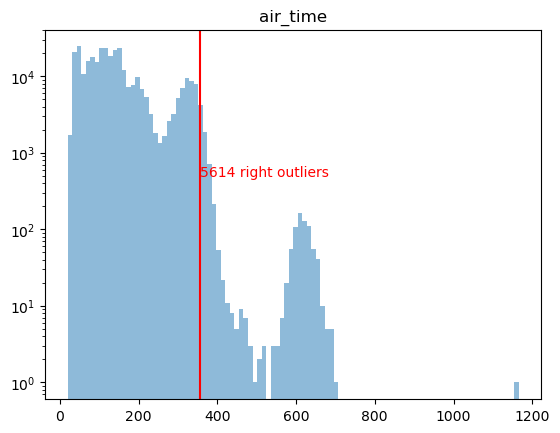

C:\ProgramData\anaconda3\lib\site-packages\matplotlib\scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


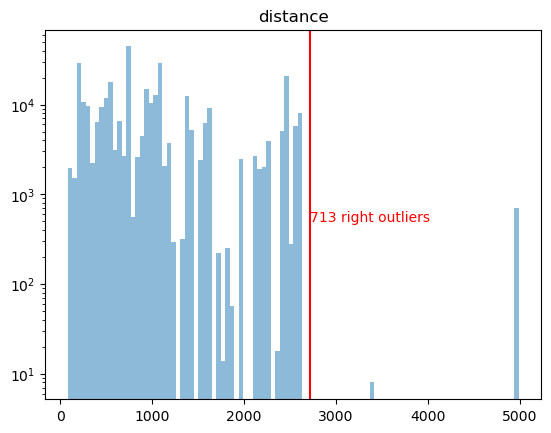

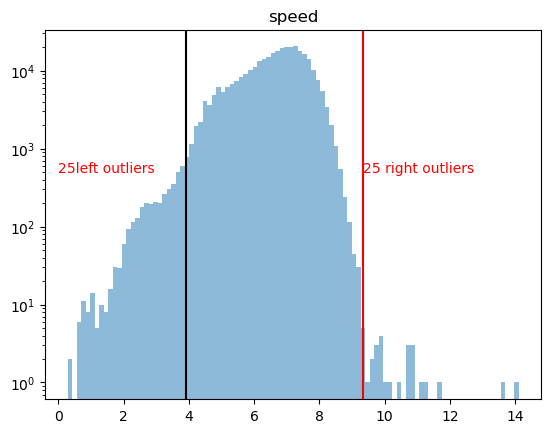

In [65]:
cols=['dep_time', 'sched_dep_time',  'arr_time',
       'sched_arr_time',  'air_time', 'distance', 
       'dayOfYear', 'speed']
ul={}
um={}


def find_outliers_bounds(data , column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    ul = q1-1.5*(q3-q1)
    um = q3+1.5*(q3-q1)
    return(ul,um)



for col in cols:  
        ul[col],um[col]=find_outliers_bounds(df , col)
        topOutliers=df.loc[df[col]>um[col]]
        btmOutliers=df.loc[df[col]<ul[col]]  
        if (len(topOutliers)>0 or len(btmOutliers)>0 ):
                plt.hist(df[col] , alpha=0.5 , bins=100 , log=True )
                if len(topOutliers)>0:
                    #print(f"num of top outliers of {x}:{len(topOutliers)}")
                    plt.axvline(x= um[col], ymin=-1, ymax=df[col].max(), color='red' , label=str(len(btmOutliers))  ) 
                    plt.annotate(str(len(topOutliers))+' right outliers' ,xy=(um[col],500) , color='red')
                if len(btmOutliers)>0:
                    #print(f"num of btm outliers of {x}:{len(btmOutliers)}")
                    plt.axvline(x=ul[col] ,ymin=-1, ymax=df[col].max(), color='black', label=str(len(btmOutliers))  ) 
                    plt.annotate(str(len(topOutliers))+'left outliers' ,xy=(0,500) , color='red' ,)
                plt.title(col)
                plt.show()
        


<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> 
    Since the number of outliers are relatively high, we do notmodify or remove them temporarily until we see the ML algorithm results. After that we decide how to deal with them. As a suggestion, we may modify the outlier values in respect to their route category ( corresponding to distance value). But yet, we postpone modifying them.
</p>    
</div>

 <div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:blue;
           font-size:120%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
          color:white ;">📌<b> Scaling features </b> 
</p>    
</div> 


<div style="color:black;
           display:fill; 
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black ;"> 
    Some of features like 'carrier_rank' are themselves in range [0,1]. Hence, we do not need to do scaling for them. the rest of the features can be scaled with z_score scaler as follows: 
</p>    
</div>

In [67]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
df=norm.fit_transform(df)

In [69]:
df

array([[6.06254299e-04, 6.06254299e-04, 1.92182613e-01, ...,
        6.06254299e-04, 3.73901330e-03, 4.75299163e-04],
       [5.95698436e-04, 5.95698436e-04, 1.98367579e-01, ...,
        5.95698436e-04, 3.71589861e-03, 4.67023440e-04],
       [9.09534287e-04, 9.09534287e-04, 3.21975138e-01, ...,
        9.09534287e-04, 4.35970102e-03, 7.13068569e-04],
       ...,
       [3.86573538e-03, 9.44957538e-03, 4.63458720e-01, ...,
        1.13824431e-01, 2.68614117e-03, 1.09439852e-04],
       [3.87383065e-03, 9.89978943e-03, 4.64429252e-01, ...,
        1.14493217e-01, 2.65218144e-03, 1.09669030e-04],
       [3.87812881e-03, 1.03416768e-02, 4.61497328e-01, ...,
        1.15051155e-01, 2.69475285e-03, 1.09790712e-04]])